In [0]:
# Các modules cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [99]:
# load data
train = pd.read_csv('/content/datasets.csv')
train.shape

(4600, 18)

In [100]:
train.info()
# nhìn qua dữ liệu thì ko có dữ liệu bị mất mát

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [101]:
(train == 0).sum(axis=0)
# các dữ liệu có giá trị bằng 0 (không có giá trị nào là isna() hoặc isnull())

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [102]:
train.country.value_counts()
# các dữ liệu chỉ thuộc 1 quốc gia

USA    4600
Name: country, dtype: int64

In [103]:
train.statezip.value_counts()
# các dữ liệu thuộc cùng 1 thành phố

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Vấn đề :
- Có 49 nhà có giá bằng 0.
- Có 2 nhà không có phòng ngủ và phòng tắm.
- 4140 dữ liệu không có view
- 4567 dữ liệu ko có bể bơi

In [104]:
train.price.value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

In [0]:
#out

In [106]:
# ma trận điểm liên quan
corr = train.corr()
corr.style.background_gradient(cmap='RdBu_r')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


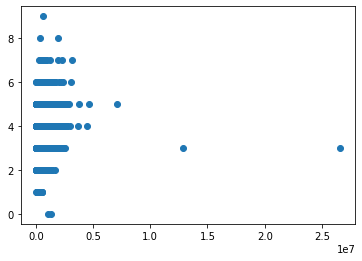

In [107]:
plt.scatter(train.price, train.bedrooms)
plt.show()

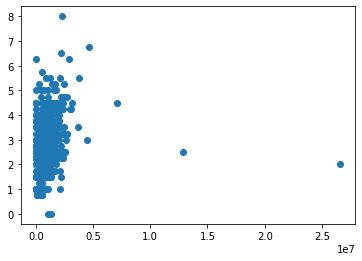

In [108]:
plt.scatter(train.price, train.bathrooms)
plt.show()

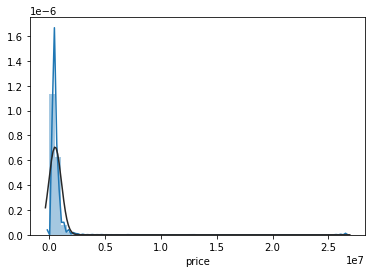

In [109]:
sns.distplot(train['price'], fit=norm)

In [110]:
train_o = train[(train.bedrooms>0) & (train.price>0) & (train.price <=2.5*10**7)].copy()
(train_o == 0).sum(axis=0)

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4518
view             4101
condition           0
sqft_above          0
sqft_basement    2715
yr_built            0
yr_renovated     2705
street              0
city                0
statezip            0
country             0
dtype: int64

In [111]:
train_o.shape
# hai cái nhà không có phòng ngủ cũng là hai cái nhà không có phòng tắm, đã loại 

(4548, 18)

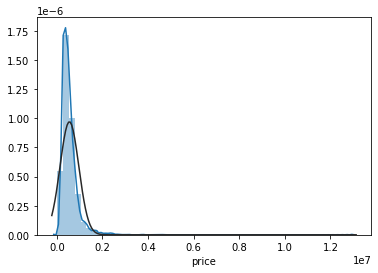

In [112]:
sns.distplot(train_o['price'], fit=norm)

In [0]:
train_o['renovated_0_1'] = train_o['yr_renovated']/train_o['yr_renovated']
train_o['renovated_0_1'] = train_o['renovated_0_1'].fillna(0)

In [114]:
# ma trận điểm liên quan
corr = train_o.corr()
corr.style.background_gradient(cmap='RdBu_r')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,renovated_0_1
price,1.000000,0.298093,0.473638,0.624519,0.073131,0.221824,0.207156,0.336839,0.042480,0.531923,0.308729,0.019494,-0.029203,-0.028924
bedrooms,0.298093,1.000000,0.545640,0.601597,0.071415,0.180789,-0.005681,0.117137,0.022071,0.492024,0.335026,0.143099,-0.060489,-0.060197
bathrooms,0.473638,0.545640,1.000000,0.761587,0.109565,0.493984,0.063315,0.207221,-0.121770,0.692507,0.295530,0.465919,-0.217157,-0.216230
sqft_living,0.624519,0.601597,0.761587,1.000000,0.213295,0.342904,0.107924,0.309491,-0.061875,0.875404,0.450633,0.284702,-0.122969,-0.122448
sqft_lot,0.073131,0.071415,0.109565,0.213295,1.000000,0.004366,0.017406,0.072726,0.000977,0.219335,0.035885,0.049191,-0.021136,-0.021594
floors,0.221824,0.180789,0.493984,0.342904,0.004366,1.000000,0.015897,0.030175,-0.273451,0.521917,-0.254972,0.467045,-0.237878,-0.236271
waterfront,0.207156,-0.005681,0.063315,0.107924,0.017406,0.015897,1.000000,0.347814,0.006103,0.072697,0.088858,-0.031986,0.015857,0.015730
view,0.336839,0.117137,0.207221,0.309491,0.072726,0.030175,0.347814,1.000000,0.062957,0.174468,0.317607,-0.066630,0.025277,0.025185
condition,0.042480,0.022071,-0.121770,-0.061875,0.000977,-0.273451,0.006103,0.062957,1.000000,-0.176008,0.197131,-0.398952,-0.184082,-0.182611
sqft_above,0.531923,0.492024,0.692507,0.875404,0.219335,0.521917,0.072697,0.174468,-0.176008,1.000000,-0.037043,0.406578,-0.163085,-0.162204


In [115]:
train_i = train_o.loc[:, ['price', 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_basement']]
corr = train_i.corr()
corr.style.background_gradient(cmap='RdBu_r')

,price,bedrooms,sqft_living,floors,waterfront,view,sqft_basement
price,1.000000,0.298093,0.624519,0.221824,0.207156,0.336839,0.308729
bedrooms,0.298093,1.000000,0.601597,0.180789,-0.005681,0.117137,0.335026
sqft_living,0.624519,0.601597,1.000000,0.342904,0.107924,0.309491,0.450633
floors,0.221824,0.180789,0.342904,1.000000,0.015897,0.030175,-0.254972
waterfront,0.207156,-0.005681,0.107924,0.015897,1.000000,0.347814,0.088858
view,0.336839,0.117137,0.309491,0.030175,0.347814,1.000000,0.317607
sqft_basement,0.308729,0.335026,0.450633,-0.254972,0.088858,0.317607,1.000000


In [0]:
X = train_o.loc[:, ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement']]
y = train_o.loc[:, ['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

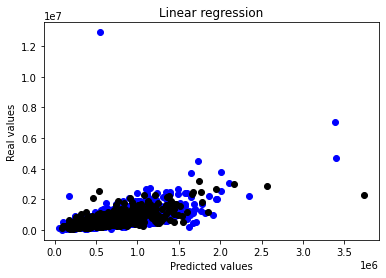

In [117]:
lr = LinearRegression()
lr.fit(X_train, y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
#plt.legend(loc = "upper left")
plt.show()

In [118]:
lr.score(X_test, y_test)

0.5438438224372033

In [119]:
# Gia tri du doan tran tap train
res = pd.DataFrame(data=train_pre, columns=['predicted values'])
# Gia tri thuc
res = y_train.reset_index().join(res)
# Tap train
resfin = res.join(X_train, on='index',lsuffix='_y')
# Gia tri thuc, gia tri du doan, sai so
resfin['predprice']=res['predicted values']
resfin['actprice']=res['price']
resfin['error']=resfin['predprice']-resfin['actprice']

# Gia tri du doan tren tap test
res_test = pd.DataFrame(data=test_pre, columns=['predicted values'])
# Gia tri thuc cua tap test
res_test = y_test.reset_index().join(res_test)
# Tap test
resfin_test = res_test.join(X_test, on='index',lsuffix='_y')
# Gia tri thuc, gia tri du doan, sai so
resfin_test['predprice']=resfin_test['predicted values']
resfin_test['actprice']=resfin_test['price']
resfin_test['error']=resfin_test['predprice']-resfin_test['actprice']

#Trung binh sai so cuar tap test.
"The mean error of our model is ${:,.0f}".format(resfin_test['error'].mean())

'The mean error of our model is $5,676'

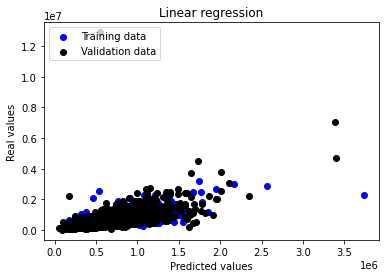

In [120]:
# Now let's plot our predicted values on one axis and the real values on the other axis
plt.scatter(resfin_test['predprice'], resfin_test['actprice'], c = "blue", label="Training data")
plt.scatter(resfin['predprice'], resfin['actprice'], c = "black", label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()